# CIFAR10 DATASET


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers.legacy import SGD

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

CIFAR-10 stands for Canadian Institute For Advanced Research 10, which is a dataset of 50,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is commonly used for image classification tasks in machine learning and computer vision.


The 10 classes in the CIFAR-10 dataset are:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [8]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

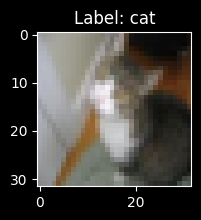

In [9]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index][0]]))


plot_sample(101)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(32, 32, 3), name="input_layer"),
        Dense(128, activation="relu", name="hidden_layer_1"),
        Dropout(0.2, name="dropout_layer_1"),
        Dense(64, activation="relu", name="hidden_layer_2"),
        Dropout(0.2, name="dropout_layer_2"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-04 21:04:13.031588: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-04 21:04:13.031651: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-04 21:04:13.031665: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-04 21:04:13.031876: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-04 21:04:13.032200: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
ann.layers

In [13]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               393344    
                                                                 
 dropout_layer_1 (Dropout)   (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                8256      
                                                                 
 dropout_layer_2 (Dropout)   (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 M

In [14]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)
epochs = 25
ann.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [15]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_ann", monitor="val_accuracy", save_best_only=True
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_ann_logs", histogram_freq=1, write_images=True
)
ann_csvlogger_callback = CSVLogger("../Logs/cifar10_ann_logs.csv")

ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        ann_checkpoint_callback,
        ann_tensorboard_callback,
        ann_csvlogger_callback,
    ],
)

Epoch 1/25


2023-08-04 21:04:15.979809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


352/352 [==============================] - ETA: 0s - loss: 2.5280 - accuracy: 0.1520

2023-08-04 21:04:20.520045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 6s 15ms/step - loss: 2.5280 - accuracy: 0.1520 - val_loss: 2.0638 - val_accuracy: 0.2548
Epoch 2/25
351/352 [============================>.] - ETA: 0s - loss: 2.2212 - accuracy: 0.2152INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 5s 13ms/step - loss: 2.2212 - accuracy: 0.2152 - val_loss: 1.9655 - val_accuracy: 0.2976
Epoch 3/25
350/352 [============================>.] - ETA: 0s - loss: 2.0760 - accuracy: 0.2517INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 4s 12ms/step - loss: 2.0760 - accuracy: 0.2520 - val_loss: 1.9291 - val_accuracy: 0.3080
Epoch 4/25
349/352 [============================>.] - ETA: 0s - loss: 2.0147 - accuracy: 0.2744INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 4s 10ms/step - loss: 2.0141 - accuracy: 0.2746 - val_loss: 1.9056 - val_accuracy: 0.3250
Epoch 5/25
350/352 [============================>.] - ETA: 0s - loss: 1.9741 - accuracy: 0.2901INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 4s 12ms/step - loss: 1.9740 - accuracy: 0.2901 - val_loss: 1.8892 - val_accuracy: 0.3326
Epoch 6/25
351/352 [============================>.] - ETA: 0s - loss: 1.9483 - accuracy: 0.3007INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 4s 11ms/step - loss: 1.9484 - accuracy: 0.3006 - val_loss: 1.8783 - val_accuracy: 0.3406
Epoch 7/25
347/352 [============================>.] - ETA: 0s - loss: 1.9300 - accuracy: 0.3110INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 4s 11ms/step - loss: 1.9306 - accuracy: 0.3108 - val_loss: 1.8717 - val_accuracy: 0.3424
Epoch 8/25
352/352 [==============================] - ETA: 0s - loss: 1.9201 - accuracy: 0.3166INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 4s 11ms/step - loss: 1.9201 - accuracy: 0.3166 - val_loss: 1.8598 - val_accuracy: 0.3444
Epoch 9/25
346/352 [============================>.] - ETA: 0s - loss: 1.9129 - accuracy: 0.3184INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 4s 10ms/step - loss: 1.9130 - accuracy: 0.3185 - val_loss: 1.8514 - val_accuracy: 0.3504
Epoch 10/25
352/352 [==============================] - 4s 11ms/step - loss: 1.9069 - accuracy: 0.3218 - val_loss: 1.8486 - val_accuracy: 0.3504
Epoch 11/25
350/352 [============================>.] - ETA: 0s - loss: 1.9022 - accuracy: 0.3243INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 7s 21ms/step - loss: 1.9021 - accuracy: 0.3244 - val_loss: 1.8397 - val_accuracy: 0.3550
Epoch 12/25
352/352 [==============================] - ETA: 0s - loss: 1.8943 - accuracy: 0.3272INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 6s 17ms/step - loss: 1.8943 - accuracy: 0.3272 - val_loss: 1.8374 - val_accuracy: 0.3590
Epoch 13/25
349/352 [============================>.] - ETA: 0s - loss: 1.8986 - accuracy: 0.3271INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 4s 12ms/step - loss: 1.8982 - accuracy: 0.3271 - val_loss: 1.8341 - val_accuracy: 0.3606
Epoch 14/25
351/352 [============================>.] - ETA: 0s - loss: 1.8938 - accuracy: 0.3301INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 4s 11ms/step - loss: 1.8937 - accuracy: 0.3301 - val_loss: 1.8386 - val_accuracy: 0.3656
Epoch 15/25
352/352 [==============================] - 4s 10ms/step - loss: 1.8907 - accuracy: 0.3314 - val_loss: 1.8330 - val_accuracy: 0.3624
Epoch 16/25
352/352 [==============================] - 3s 9ms/step - loss: 1.8870 - accuracy: 0.3330 - val_loss: 1.8349 - val_accuracy: 0.3588
Epoch 17/25
352/352 [==============================] - 3s 10ms/step - loss: 1.8901 - accuracy: 0.3360 - val_loss: 1.8367 - val_accuracy: 0.3576
Epoch 18/25
352/352 [==============================] - 3s 10ms/step - loss: 1.8877 - accuracy: 0.3320 - val_loss: 1.8363 - val_accuracy: 0.3552
Epoch 19/25
352/352 [==============================] - 3s 10ms/step - loss: 1.8837 - accuracy: 0.3361 - val_loss: 1.8358 - val_accuracy: 0.3568
Epoch 20/25
352/352 [==============================] - 3s 10ms/step - loss: 1.8840 - accuracy: 0.3317 - val_loss: 1.8320 - val_accuracy: 0.3630
Epoch

In [16]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["accuracy"]
ann_val_acc = ann_history.history["val_accuracy"]
ann_val_loss = ann_history.history["val_loss"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 1.950254192352295
Validation loss: 1.864268832206726
0.309470 Training accuracy with a standard deviation of 0.043334
0.345288 Validation accuracy with a standard deviation of 0.024881


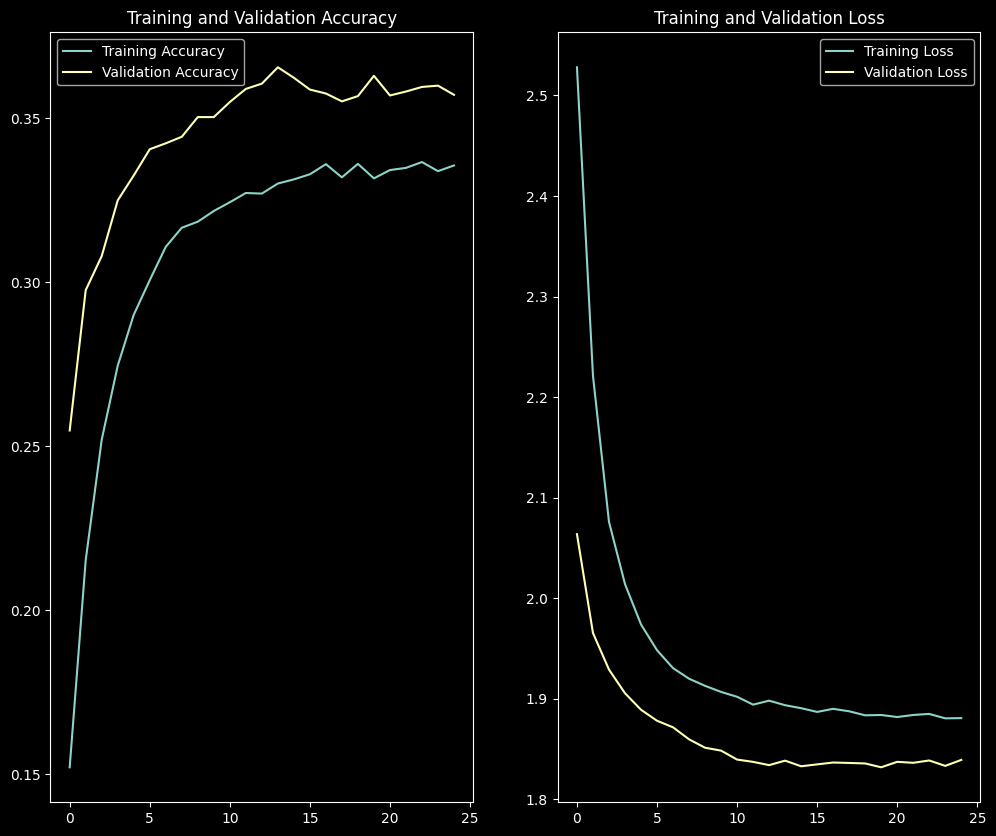

In [17]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_ann_acc_loss.png", bbox_inches="tight")

In [18]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 1.8202 - accuracy: 0.3648
Test loss: 1.8202128410339355
Test accuracy: 0.36480000615119934


In [19]:
y_pred = ann.predict(X_test)

 72/313 [=====>........................] - ETA: 0s

2023-08-04 21:06:00.727095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=(32, 32, 3),
            name="conv_layer_1",
        ),
        MaxPooling2D((2, 2), name="pooling_layer_1"),
        Dropout(0.2, name="dropout_layer_1"),
        Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            name="conv_layer_2",
        ),
        MaxPooling2D((2, 2), name="pooling_layer_2"),
        Dropout(0.2, name="dropout_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(128, activation="relu", name="dense_layer_1"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [ ]:
cnn.layers

In [ ]:
cnn.summary()

In [ ]:
cnn.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_cnn",
    monitor="val_accuracy",
    save_best_only=True,
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_cnn_logs", histogram_freq=1, write_images=True
)
cnn_csvlogger_callback = CSVLogger("../Logs/cifar10_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

In [ ]:
cnn_train_acc = cnn_history.history["accuracy"]
cnn_val_acc = cnn_history.history["val_accuracy"]
cnn_train_loss = cnn_history.history["loss"]
cnn_val_loss = cnn_history.history["val_loss"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

In [ ]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_cnn_acc_loss.png", bbox_inches="tight")

In [ ]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

In [ ]:
y_pred = cnn.predict(X_test)